<center>

# <font color='darkblue'>ASTR 21100/31200 </font>

<center>
    
# <font color='darkblue'>"Computational Techniques in Astrophysics" </font>
    
<center>
    
# <font color='darkblue'>Function approximation methods </font>

<center>
    
## <font color='darkblue'>Instructor: Andrey Kravtsov </font>

In [1]:
import numpy as np 

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline

from codes.plotting import plot_prettier, plot_line_points
plot_prettier()

### <font color='darkblue'>Function approximating methods </font>

Approximating a function that is represented by a finite number of discrete tabulated values or measurements. In each case, there is some uncertainty associated with function values: by *tabulated values* we mean function values computed as accurately as *machine precision* allows. By measurements we mean values of function measured in some way with associated uncertainties usually much larger than the accuracy that is allowed by machine precision. 

### <font color='darkblue'>General approach for approximating function $f(x)$: </font>

1. Define ***training*** and ***test (aka validation)*** sets of values of the function variable $\{x_{i,\rm train}\}$ and $\{x_{j,\rm test}\}$. Evaluate function at these to get $\{f_{i,\rm train}\}=\{f(x_{i,\rm train})\}$ and $\{f_{j,\rm test}\}=\{f(x_{j,\rm test})\}$ function values. Brackets $\{\}$ indicate that we have a series of values, not just one. 


2. Choose an easier to compute approximation function to approximate the actual (computationally expensive) function.


3. Use the function values $\{f_{i,\rm train}\}$ calculated for the training set of parameter values in step 1 to calculate parameters of the approximating function $f_{\rm approx}(x)$.

    
4. *Test* (*validate*) the accuracy of the approximation by comparing values of the approximating function at the values of $x_{j,\rm test}$ using absolute or fractional error: $f_{j,\rm test}-f_{\rm approx}(x_{j,\rm test})$ or $f_{\rm approx}(x_{j,\rm test})/f_{j,\rm test}-1$. 
    
    
In the notebooks 05 and 06 we will consider specific choices for the approximating function: a *global* polynomial form for $f_{\rm approx}(x)$ or piece-wise polynomial representation where $f_{\rm approx}(x)$ is represented by a sum of polynomials which are defined only over a sub-interval of $x$ are are 0 elsewhere. 

### <font color='darkblue'>Interpolation vs regression </font>
    
There are two main types of function approximation: interpolation vs regression. 
    
Interpolation matches the training values of the function to the level machine precision allows.
    
Regression aims to approximate the overall behavior of the training points, but does not match their values. Instead it minimizes the differences between training values and approximation using some metric. 



### <font color='darkblue'>Why do we need to approximate functions? </font>


* To be able to compute function values between available tabulated (training) points. 

***Example*** below involves a more complicated function. This function is computed with <a href="https://camb.info/">the CAMB code</a> computing evolution of small perturbations in the early stages of the universe by solving a system of Boltzmann differential equations. 

In [2]:
k, pk = np.loadtxt('https://astro.uchicago.edu/~andrey/classes/a211/data/test_matterpower_logintk1000.dat', 
                   usecols=(0, 1),  unpack=True)

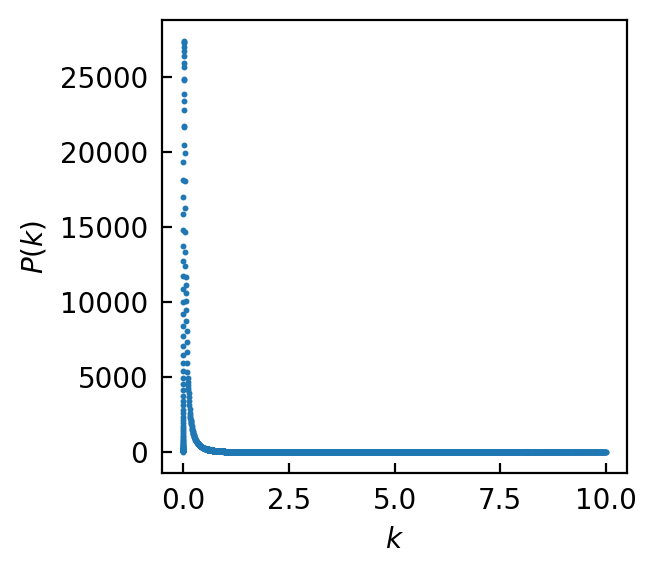

In [3]:
plt.figure(figsize=(3,3))
plt.xlabel(r'$k$'); plt.ylabel(r'$P(k)$')
plt.scatter(k, pk, marker='.', s=5 )
plt.show()

The function $P(k)$ is tabulated at 3092 values of $k$ and these are not evenly spaced. Let's try to construct an interpolating polynomial for it, which would have to be of 3091th order. 

### <font color='darkblue'>Why do we need to approximate functions? </font>

* To speed up calculation of a function.

In [4]:
from astropy.cosmology import LambdaCDM
import astropy.units as u

def d_l_astropy(z, H0, Om0, OmL):
    cosmo = LambdaCDM(H0=H0, Om0=Om0, Ode0=OmL)
    return cosmo.luminosity_distance(z=z) / u.Mpc

In [5]:
from time import time

nrand = 10000
om0 = np.random.uniform(0., 1., size=nrand)
oml = 1 - om0 # np.random.uniform(0., 1., size=nrand)
dltrain = np.zeros((nrand))

z = 2.; H0 = 70.
t0 = time()
for i, om in enumerate(om0): 
    dltrain[i] = d_l_astropy(z, H0, om, oml[i])
    
t = time() - t0 
print(f'finished in {t:.2f} sec')

finished in 6.74 sec


### <font color='darkblue'>Why do we need to approximate functions? </font>

* To have a smooth approximation to a function represented by noisy data (either due to observational or theoretical uncertainties). 

This is common in statistical analyses and Machine Learning (ML). 

<center>

### <font color='darkblue'>Approximating functions: interpolation vs regression </font>

<p>
<center>
<img width=800 src="https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-3-319-21176-3_6/MediaObjects/331467_1_En_6_Fig1_HTML.gif"></img>
 

### <font color='darkblue'>Approximating functions: interpolation, regression, extrapolation </font>

<p>
<center>
<img width=600 src="https://imgs.xkcd.com/comics/curve_fitting_2x.png"></img>
 

### <font color='darkblue'>Why do we need to approximate functions? </font>

* To have easily calculable approximation for the integral or derivatives of a function. 

### <font color='darkblue'>We already used function approximation to get estimate first derivative and integral  </font>

*Piecewise-linear* approximation using in the trapezoidal integration scheme $T(h)$. 

*Piecewise-quadratic* approximation using Simpson scheme $R_1(h)=[4T(h/2)-T(h)]/3$. 

*Piecewise-cubic* approximation of integrated function is used in Boole scheme $R_2(h)=[16R_1(h/2)-R_1(h)]/15$

etc.

### <font color='darkblue'>Approximation by a piecewise quadratic function (polynomial of order 2)  </font>
    
Can be constructed using over $N$ intervals formed by $N+1$ "training values" $f_i=f(x_i)$ for $N+1$ values $x_i$: 

$$f(x)\approx \sum\limits_{i=0}^{N-1} q_i(x)$$
    
where 
$$
q_i(x) = \begin{cases} a_i + b_ix + c_i x^2,\ {\rm for}\ x\in[x_i,x_{i+2})\\
0,\ \rm otherwise
\end{cases}
$$
               

### <font color='darkblue'>Approximation by a piecewise quadratic function (polynomial of order 2)  </font>

To determine the coefficients $a_i$, $b_i$, $c_i$ we need 3 function values. 

Defining $q_i(x)=a_i + b_i(x-x_i) + c_i (x-x_i)^2$ within $[x_i,x_{i+1})$ and using

$$ f(x_i) = a_i + b_i(x-x_i) + c_i (x-x_i)^2 = a_i,$$

$$ f(x_{i+1}) = a_i + b_i(x_{i+1}-x_i) + c_i (x_{i+1}-x_i)^2=a_i + b_i\Delta_{i+1} + c_i \Delta_{i+1}^2, $$

$$ f(x_{i+2}) = a_i + b_i(x_{i+2}-x_i) + c_i (x_{i+2}-x_i)^2=a_i + b_i\Delta_{i+2} + c_i \Delta_{i+2}^2. $$


We can use the last two equations to get $b_i$ expressed as $c_i$, which we can then plug into one of these equations to get $c_i$.

### <font color='darkblue'>"Global" polynomial approximation as a limit of piecewise polynomial approximation </font>
    

$$f(x)\approx a_0 + a_1x + a_2x^2 + \ldots a_m x^m = \sum\limits_{k=0}^m a_k x^k,$$

    
where $a_k$ are coefficients that are to be determined using "training values" of $f(x)$ at $N\geq m+1$ values of $x$. 

### <font color='darkblue'>Computing coefficients $a_i$  </font>

The linear system of $N+1$ equations  can be used to solve for $N+1$ coefficients of the polynomial approximation for $f(x)$ using $N+1$ training values of $x_i$ and $f_i=f(x_i)$: 

\begin{eqnarray}
f_{0} &=&  a_0 + a_1 x_0 + a_2 x^2_0 +\ldots + a_N x^N_0\\
f_{1} &=&  a_0 + a_1 x_1 + a_2 x^2_1 +\ldots + a_N x^N_1\\
\ldots & & \ldots\\
f_{N} &=&  a_0 + a_1 x_N + a_2 x^2_N +\ldots + a_N x^N_N\\
\end{eqnarray}

For example, consider a system of two equations

\begin{eqnarray}
f_0 &=& a_0 + a_1 x_0\\
f_1 &=& a_0 + a_1 x_1
\end{eqnarray}

Suppose we have 2 training points, $x_0=1$, $x_1=2$, and function values at these points $f_0=3$, $f_1=5$. We can easily solve this system ourselves for the coefficients: $a_0=2$, $a_1=1$. 

Here is how this can be done using python and solution approach outlined above. 

We can think of the set of $f_i$ and $a_i$ values as forming vectors $\mathbf{f}$ and $\mathbf{a}$ and the system of equations can be written in matrix form as: 

$$\mathbf{f}=\begin{bmatrix}
f_0  \\
f_1 \\
\vdots \\
f_N
\end{bmatrix}=\mathbf{V}\mathbf{a}=\begin{bmatrix}
1 & x_0 & x_0^2 & \ldots & x_0^N \\
1 & x_1 & x_1^2 & \ldots & x_1^N \\
\vdots & & \ddots & & \vdots\\
1 & x_N & x_N^2& \dots& x_N^N 
\end{bmatrix}\begin{bmatrix}
a_0  \\
a_1 \\
\vdots \\
a_N
\end{bmatrix},$$ 

Naive direction solution: $\mathbf{a} =\mathbf{V}^{-1}\cdot\mathbf{f}$.

where  $\mathbf{V}$ is called the Vandermonde matrix after French mathematician <a href="https://en.wikipedia.org/wiki/Alexandre-Th%C3%A9ophile_Vandermonde">Alexandre-Théophile Vandermonde</a> (1735-1796).


$$
\mathbf{V}=
\begin{bmatrix}
1 & x_0 & x_0^2 & \ldots & x_0^N \\
1 & x_1 & x_1^2 & \ldots & x_1^N \\
\vdots & & \ddots & & \vdots\\
1 & x_N & x_N^2& \dots& x_N^N 
\end{bmatrix}
$$


Numpy has a function <a href="https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html">numpy.vander</a> that facilitates formation of the matrix $\mathbf{V}$, which we will use here for convenience.

In [6]:
xtrain = np.array([1., 2.])
ftrain = np.array([3., 5.])

# construct the Vandermonde matrix for vector xtr
vmat = np.vander(xtrain, N=np.size(xtrain), increasing=True) 

# solve for the polynomial using direct solution with inverse V
a = np.linalg.solve(vmat, ftrain) 

# the coefficients are in reverse order in a, so we can reverse it for printing using ::-1 slicing
print(a[::-1])

[2. 1.]


In [7]:
a = np.linalg.solve(vmat, ftrain) # much more numerically stable! 
print(a[::-1])

[2. 1.]


### <font color='darkblue'>A simple example: approximating a sine with a polynomial</font>


Code below will work for polynomials up to a certain order, but then will start failing due to severe roundoff errors. 

In [8]:
# set up vector of training points
xmin, xmax, ntr = 0., 2.*np.pi, 1001
xtr = np.linspace(xmin, xmax, ntr)

# for testing points use sin(x) function
# compute function values at training points
ftr = np.sin(xtr)

# set up a vector of test points
nt = 100 # should be different from ntr
xt = np.linspace(xmin, xmax, nt)

In [9]:
# construct Vandermonde matrix for xtr vector
vmat = np.vander(xtr, N=xtr.size, increasing=True) 

# solve for polynomial coefficients vector a, as a=V^{-1}f
#a = np.dot(np.linalg.inv(V), ftr) 
a = np.linalg.solve(vmat, ftr) 

# np.poly1d initializes a 1d polynomial class with input coefficients
# [::-1] reverses order of the coefficients, as required by this function
pfit = np.poly1d(a[::-1]) 

# now compute interpolating polynomial approximation at test values xt
poly_int = pfit(xt)

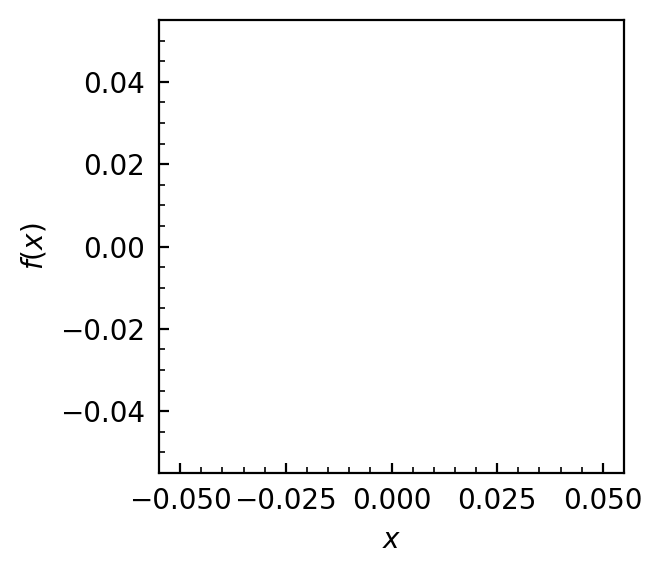

In [10]:
plot_line_points(xt, poly_int, xp=xtr, yp=ftr, points=False, psize=40, 
                 xlabel=r'$x$', ylabel=r'$f(x)$', figsize=3)
#plot_line_points(xt[:-1], np.abs(np.maximum(poly_int[:-1]/np.sin(xt[:-1])-1,2.e-16)), xp=xtr, yp=ftr, points=False, psize=40, 
#                 xlabel=r'$x$', ylabel=r'$f(x)$', figsize=3)

The issue is that the matrix $\bf{V}$ becomes "ill-conditioned" - meaning that its property called <a href="https://www.rampfesthudson.com/what-does-it-mean-for-a-matrix-to-be-well-conditioned/">condition</a> that becomes very large. When this happen operations with such matrix such as those involved with solving system of relevant equations become subject to sever roundoff errors. 

In [13]:
# numpy function that computes "condition" of a given matrix
np.linalg.cond(vmat)

inf

### <font color='darkblue'>Another method of interpolation using NumPy <tt>polyfit</tt>


In [17]:
# set up vector of training points
xmin, xmax, ntr = 0., 2.*np.pi, 31
xtr = np.linspace(xmin, xmax, ntr)

# for testing points use sin(x) function
# compute function values at training points
ftr = np.sin(xtr)

# set up a vector of test points
nt = 100 # should be different from ntr
xt = np.linspace(xmin, xmax, nt)

In [18]:
polyfit = np.polyfit(xtr, ftr, ftr.size) 
pfit = np.poly1d(polyfit) # initialize 1d polynomial class with these coefficients
poly_int = pfit(xt) # return polynomial values at test points

C:\Users\akrav\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


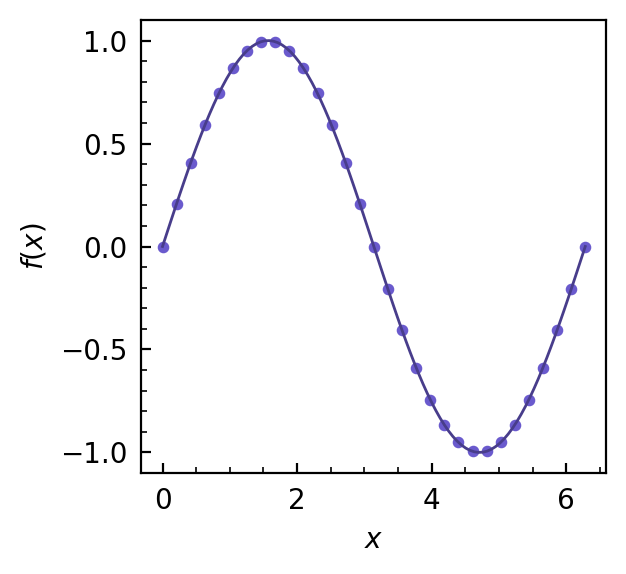

In [19]:
plot_line_points(xt, poly_int, xp=xtr, yp=ftr, points=True, psize=40, 
                 xlabel=r'$x$', ylabel=r'$f(x)$', figsize=3)

### <font color='blue'>Solving the system of equations 

* To solve the system of linear equations  arising in the problem of approximating functions by a polynomial the most common methods use so-called <a href="https://en.wikipedia.org/wiki/LU_decomposition">LU</a> or <a href="https://en.wikipedia.org/wiki/QR_decomposition">QR</a> matrix decomposition methods or the <a href="https://en.wikipedia.org/wiki/Singular_value_decomposition">Singular Value Decomposition</a> (SVD) method. The LU decomposition is used in <a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html"><tt>np.linalg.solve</tt> function</a> which should be used to solve such systems of equations. 
    
***Note:*** You don't need to understand these methods. We do not have the time to go over them in this course. However, they are well developed and established with reliable functions available that implement them. 

SVD is used in <tt>numpy.linalg.lstsq</tt> for least squares regression that will be discussed later. 

Understanding these methods is not required for our purposes. Just knowledge that methods much more stable than direct inversion of $\mathbf{V}$ will suffice. 

Now let's apply the same approach to approximate $d_L$ as a function of $\Omega_{\rm m0}$, but using <a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html"><tt>np.linalg.solve</tt> function</a>. 

For illustration purposes we will assume a "geometrically flat" universe, in which $\Omega_\Lambda = 1-\Omega_{\rm m0}$ and we will keep $H_0$ fixed at 70 and $z$ fixed at 0.1, which makes $d_L$ a function of $\Omega_{\rm m0}$ only.  

### <font color='blue'>Example: approximating $d_L(\Omega_{\rm m0})$ using polynomial </font>

denoting $x=\Omega_{\rm m0}$ for convenience, $x^k$ (*monomial* basis): 

$$d_L = \sum\limits_{i=0}^{p}a_i x^i = a_0 + a_1 x + a_2 x^2 +\ldots + a_p x^p
$$

In [159]:
ntrain, ntest = 11, 3110 # number of the training set and test points
om0min, om0max = 0, 1.
om0train = np.linspace(om0min, om0max, ntrain)
om0test = np.linspace(om0min, om0max, ntest)

z = 5
# evaluate d_L at training points
dltrain = np.empty_like(om0train)
for i, omd in enumerate(om0train):
    dltrain[i] = d_l_astropy(z, 70., omd, 1.-omd)
    
# evaluate d_L at test points
dltest = np.empty_like(om0test)
for i, omd in enumerate(om0test):
    dltest[i] = d_l_astropy(z, 70., omd, 1.-omd)

In [160]:
vmat = np.vander(om0train, N=ntrain, increasing=True) # set up the Vandermonde matrix

a = np.linalg.solve(vmat, dltrain) # solve system of linear equations for coefficients a
# object for polynomial with coefficients a 
# [::-1] reverses order of the coefficients, as required by this function
pfit = np.poly1d(a[::-1]) 
dlpoly = pfit(om0test)

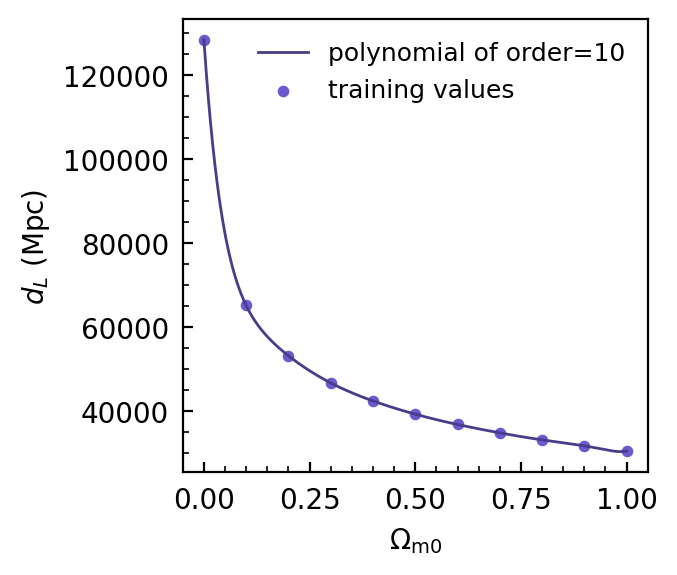

In [161]:
plot_line_points(om0test, dlpoly, xp=om0train, yp=dltrain, points=True,
                 xlabel=r'$\Omega_{\rm m0}$', ylabel=r'$d_L\rm\ (Mpc)$', 
                 legend='polynomial of order=%d'%(ntrain-1), plegend='training values',
                 legendloc='upper right', figsize=3, psize=40)

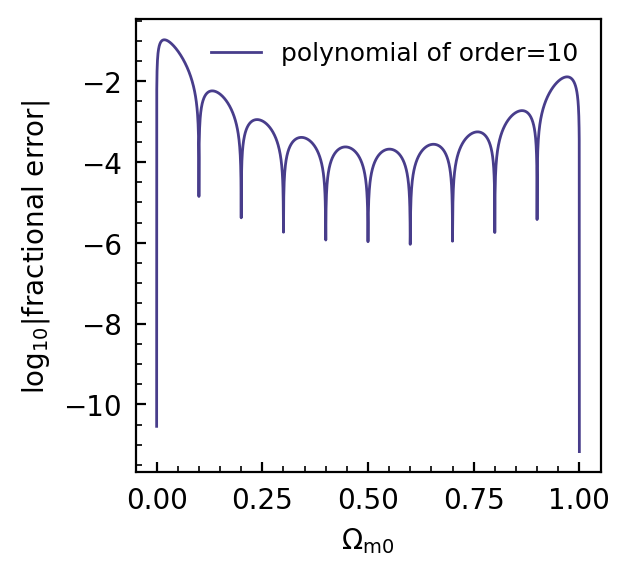

In [162]:
plot_line_points(om0test, np.log10(np.maximum(np.abs(1.-dlpoly/dltest), np.abs(dlpoly)/2**52)),
                 xlabel=r'$\Omega_{\rm m0}$', ylabel=r'$\log_{10}\vert\rm fractional\ error\vert$', 
                 legend='polynomial of order=%d'%(ntrain-1), plegend='training values',
                 legendloc='best', figsize=3)

In [166]:
nrand = 10000
om0 = np.random.uniform(0., 1., size=nrand)

t0 = time()
dl_approx = pfit(om0)

t = time() - t0 
print(f'finished in {t:.10e} sec')

finished in 1.0874271393e-03 sec


### <font color='blue'>Extrapolation

If we use $\tilde{f}(x)$ constructed using one of these approaches for $x<x_0$ or $x>x_N$, this is called ***extrapolation***.
    
Experiment below shows that if $d_L$ calculation is trained for $\Omega_{\rm m0}\in [0,1]$, we examine extrapolatinon to $\Omega_{\rm 0}>1$. 

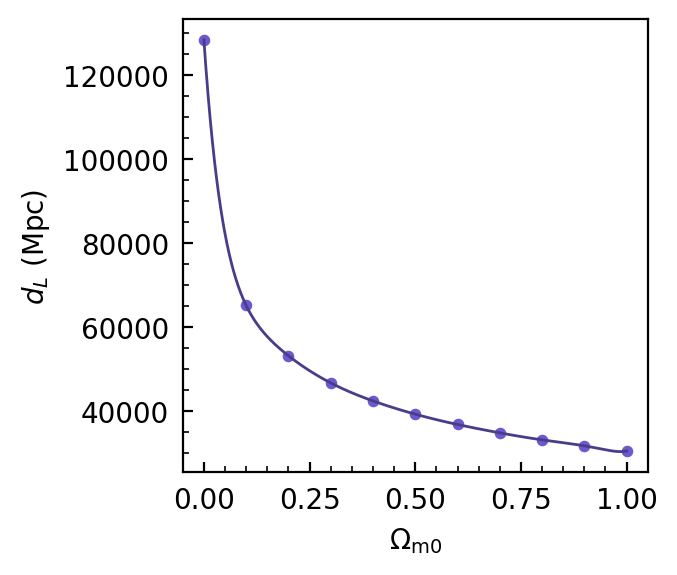

In [171]:
om0test_ex = np.linspace(0.,1.,1000)

dlpoly_ex = pfit(om0test_ex)
plot_line_points(om0test_ex, dlpoly_ex, xp=om0train, yp=dltrain, points=True, psize=40, 
                 xlabel=r'$\Omega_{\rm m0}$', ylabel=r'$d_L\rm\ (Mpc)$', figsize=3)

### <font color='blue'>The general rule of extrapolation


# <font color='blue'>DON'T!$^\star$


$^\star$ Unless you have a good mathematical or physics-based model for how your function should behave outside the approximation interval.

## <font color='blue'>Polynomial approximation using non-even spacing of training points 

If there is a choice of where to place training values within the interval where function is approximating, there are choices for such placement that may produce more accurate and numerically stable results than for evenly spaced training values.

### <font color='blue'>Chebyshev interpolation nodes 

Chebyshev nodes are either *roots (zeros) or extrema (maxima and minima) of the <a href="https://en.wikipedia.org/wiki/Chebyshev_polynomials">Chebyshev polynomials</a>.* 

Geometrically, these nodes can be obtained by placing equidistant points on the upper half of the circle of unit radius and projecting them onto $x$ axis.  The projection creates point distribution with density increasing towards the edges of the interval. The 1st and 2nd kind differ in where the equidistant points are placed.

Equivalently, we can set up angles using eqal step in angle and the Chebyshev nodes will be cosines of these angles.

<img width=800 src="https://astro.uchicago.edu/~andrey/classes/a211/img/Chebyshev-nodes-by-projection.png"></img>

### <font color='blue'>Chebyshev nodes of the first kind</font>

$N+1$ Chebyshev nodes of the 1st kind on the interval $[-1,1]$ are defined as

$$x_i=\cos\left[\frac{(2i+1)}{2N+2}\,\pi\right],\ \ \ \ i=0,\ldots,N$$

### <font color='blue'>Chebyshev nodes of the second kind</font>

$N+1$ Chebyshev nodes of the 2nd kind on the interval $[-1,1]$ are defined as

$$x_i=\cos\frac{i}{N}\,\pi,\ \ \ \ i=0,\ldots,N$$


### <font color='blue'>Rescaling Chebyshev nodes to an arbitrary interval $[a,b]$</font>

Chebyshev nodes are defined for the interval $[-1,1]$, but once they are generated for this interval, they can be rescaled to the required interval $[a,b]$ as 

$$x_i=a + \frac{(b-a)}{2}(1+x_{i,\rm Cheb}),$$

where $x_{i,\rm Cheb}$ are the Chebyshev nodes (1st or 2nd kind) defined on the interval $[-1,1]$.

Formally, the weights get rescaled by $2^N(b-a)^N$ when nodes are rescaled from $[-1,1]$ to $[a,b]$. However, given that this rescaling factor does not depend on $i$ it cancels out in the barycentric interpolation formula, so whether it is included or not does not change this formula. 

In [173]:
# functions generating N+1 Chebyshev nodes of the 1st and 2nd kind 
# for input N, and interval edges a and b

def chebyshev_nodes1(a, b, N):
    return a + 0.5*(b-a)*(1. + np.cos((2.*np.arange(N+1)+1)*np.pi/(2.*(N+1))))

def chebyshev_nodes2(a, b, N):
    return a + 0.5*(b-a)*(1. + np.cos(np.arange(N+1)*np.pi/N))

In [177]:
ntrain, ntest = 11, 3110 # number of the training set and test points
om0train = chebyshev_nodes1(om0min, om0max, ntrain-1)
om0test = np.linspace(om0min, om0max, ntest+1)

# evaluate d_L at training points
dltrain = np.empty_like(om0train)
for i, omd in enumerate(om0train):
    dltrain[i] = d_l_astropy(z, 70., omd, 1.-omd)
    
# evaluate d_L at test points
dltest = np.empty_like(om0test)
for i, omd in enumerate(om0test):
    dltest[i] = d_l_astropy(z, 70., omd, 1.-omd)

In [178]:
vmat = np.vander(om0train, N=ntrain, increasing=True) # set up the Vandermonde matrix

a = np.linalg.solve(vmat, dltrain) # solve system of linear equations for coefficients a
# object for polynomial with coefficients a 
# [::-1] reverses order of the coefficients, as required by this function

pfit = np.poly1d(a[::-1]) 
dlpoly = pfit(om0test)

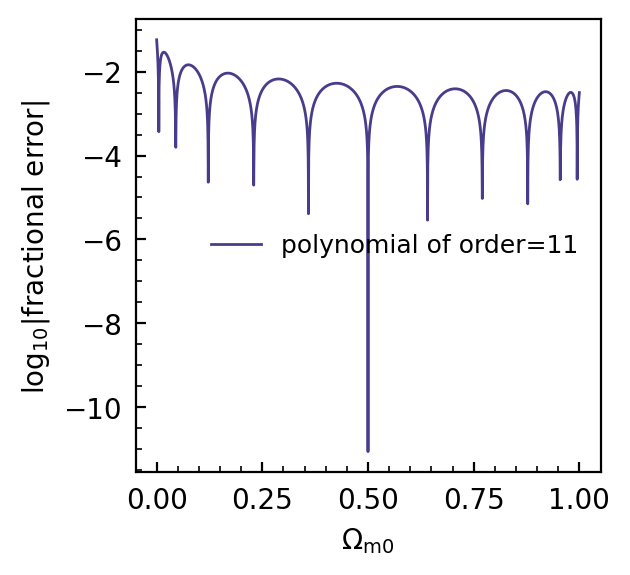

In [179]:
plot_line_points(om0test, np.log10(np.maximum(np.abs(1.-dlpoly/dltest), np.abs(dlpoly)/2**52)),
                 xlabel=r'$\Omega_{\rm m0}$', ylabel=r'$\log_{10}\vert\rm fractional\ error\vert$', 
                 legend='polynomial of order=%d'%ntrain, plegend='training values',
                 legendloc='best', figsize=3)

### <font color='blue'>A different example</font>

In [200]:
def func(x):
    return 1. / (1. + 12.*x**2)

x = np.linspace(-1., 1., 100)
fx = func(x)

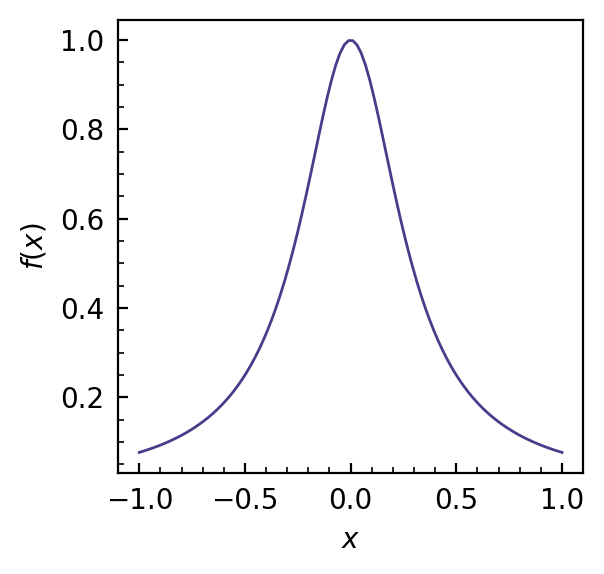

In [201]:
plot_line_points(x, fx, points=False, 
                 xlabel=r'$x$', ylabel=r'$f(x)$', 
                 figsize=3)

In [187]:
xmin, xmax, ntr = -1., 1., 15

# training point set
xte  = np.linspace(xmin, xmax, ntr)  # evenly spaced
xtc1 = chebyshev_nodes1(xmin, xmax, ntr) # Chebyshev type 1
xtc2 = chebyshev_nodes2(xmin, xmax, ntr) # Chebyshev type 2

# a set of test points for plotting
ntest = 1000
xt = np.linspace(-1., 1., ntest)

In [188]:
def poly_int(xtrain, ftrain, xtest):
    '''
    Construct polynomial interpolation using training points xtrain, ftrain
    Returns: 
        a vector of values of approximations evaluated at xtest 
    '''
    assert(porder < xtrain.size)
    vmat = np.vander(xtrain, N=np.size(xtrain), increasing=True) 
    # solve for the polynomial using direct solution with inverse V
    a = np.linalg.solve(vmat, ftrain) 

    pfit = np.poly1d(a[::-1]) # initialize 1d polynomial class with these coefficients
    return pfit(xtest) 

In [189]:
poly_int_e  = poly_int(xte, func(xte), xt)
poly_int_c1 = poly_int(xtc1, func(xtc1), xt)
poly_int_c2 = poly_int(xtc2, func(xtc2), xt)

In [204]:
plot_line_points(xt, poly_int_e, xp=xte, yp=func(xte), points=True, psize=40,
                 plot_title = r'%d equidistant points on interval [%.1f,%.1f]'%(ntr,xmin,xmax),
                 xlabel=r'$x$', ylabel=r'$f(x)=1/(1+12x^2)$', figsize=3)

In [192]:
plot_line_points(xt, poly_int_e, xp=xte, yp=func(xte), points=True, psize=40,
                 plot_title = r'%d equidistant points on interval [%.1f,%.1f]'%(ntr,xmin,xmax),
                 xlabel=r'$x$', ylabel=r'$f(x)=1/(1+12x^2)$', figsize=3)

**WOW! Approximation looks crazy near the edges, even though it still goes through the training points!**

What you see here is called ***Runge oscillations*** or <a href="https://en.wikipedia.org/wiki/Runge%27s_phenomenon">***Runge phenomenon***</a>... It makes application of polynomial interpolation for evenly spaced training poits all but impossible for functions that change significantly on the scale comparable to separation between training points. 

Runge oscillations were discovered by applied mathematician Carl Runge in 1901.

**However, for the Chebyshev nodes approximation looks good!**

In [193]:
plot_line_points(xt, poly_int_c1, xp=xtc1, yp=func(xtc1), points=True, psize=40, 
                 plot_title = r'%d Chebyshev nodes of 1st kind on interval [%.1f,%.1f]'%(ntr,xmin,xmax),
                 xlabel=r'$x$', ylabel=r'$f(x)=1/(1+12x^2)$', figsize=3)

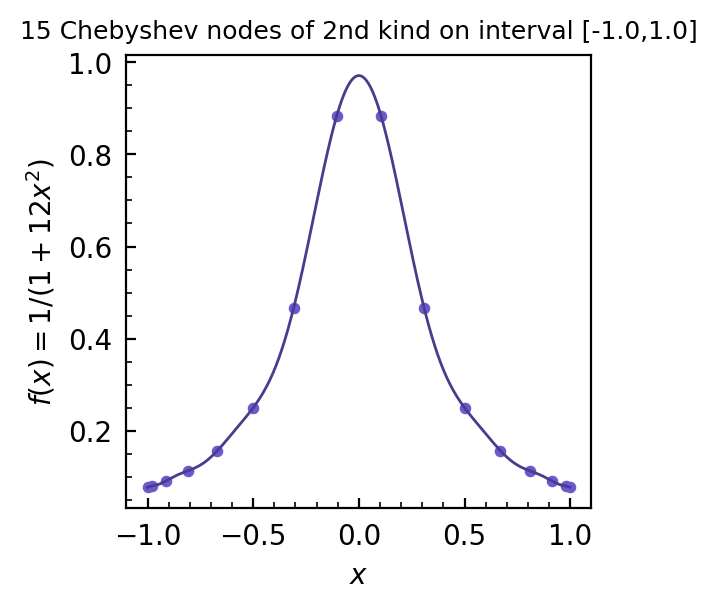

In [349]:
plot_line_points(xt, poly_int_c2, xp=xtc2, yp=func(xtc2), points=True, psize=40, 
                 plot_title = r'%d Chebyshev nodes of 2nd kind on interval [%.1f,%.1f]'%(ntr,xmin,xmax),
                 xlabel=r'$x$', ylabel=r'$f(x)=1/(1+12x^2)$', figsize=3)

In [206]:
def poly_fit(xtrain, ftrain, xtest, porder=3):
    '''
    Construct polynomial regression or interpolation using training points xtrain, ftrain
    with a polynomial of order porder
    
    Returns: 
        a vector of values of approximations evaluated at xtest 
    '''
    assert(porder < xtrain.size)
    polyfit = np.polyfit(xtrain, ftrain, porder)
    pfit = np.poly1d(polyfit) # initialize 1d polynomial class with these coefficients
    return pfit(xtest) 



In [207]:
def ftr_func(x, scale=0.5): 
    return 1.5*x + np.sin(x) 

In [208]:
xtr = np.linspace(0, 6, 30)
xt = np.linspace(0, 6, 200)
ftr = ftr_func(xtr)

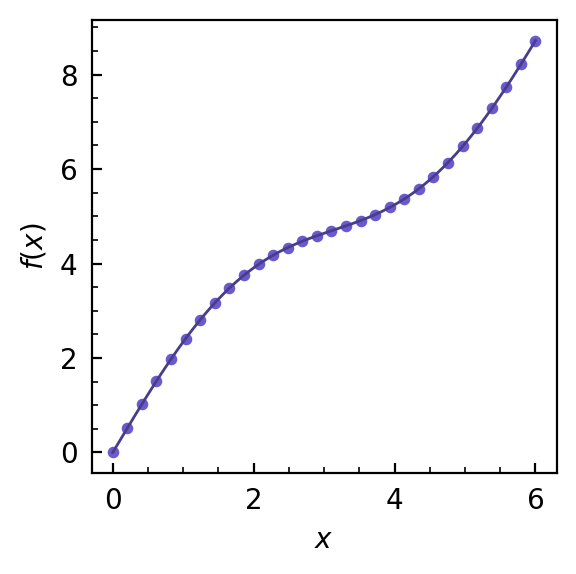

In [212]:
ftest = poly_int(xtr, ftr, xt)
#ftest = poly_fit(xtr, ftr, xt, porder=xtr.size-1)

plot_line_points(xt, ftest, xp=xtr, yp=ftr, points=True, psize=40, 
                 xlabel=r'$x$', ylabel=r'$f(x)$', figsize=3)

### <font color='blue'>Regression</font>

### <font color='blue'>Approximating functions: interpolation vs regression</font>

If we have a training set of $N+1$ function values, $f_i$, at points $\{x_i\}$ ($i=0,\dots,N$) allow construction of approximation expansion of the order $m\leq N$ 

* **Interpolation:** $m=N$ and we require approximating function to match each training set value $f_i$ to machine precision. 

The problem is fully determined  because we have $N+1$ tabulated training values, $f_i$, to constrain $N+1$ $a_k$ coefficients. This can be done by solving the linear system of equations using some method. 

* **Regression:** $m\leq N$ and we do not require approximating function to match any of the training $f_i$ values. 

In this case, coefficients are determined using a set of conditions. 

### <font color='blue'>Computing coefficients $a_i$  for interpolation</font>

The linear system of $N+1$ equations  can be used to solve for $N+1$ coefficients of the polynomial approximation for $f(x)$ using $N+1$ training values of $x_i$ and $f_i=f(x_i)$: 

\begin{eqnarray}
f_{0} &=&  a_0 + a_1 x_0 + a_2 x^2_0 +\ldots + a_m x^m_0\\
f_{1} &=&  a_0 + a_1 x_1 + a_2 x^2_1 +\ldots + a_m x^m_1\\
\ldots & & \ldots\\
f_{N} &=&  a_0 + a_1 x_N + a_2 x^2_N +\ldots + a_m x^m_N\\
\end{eqnarray}

when $m<N$ the equations are *overdetermined* for for the coefficients (we have more equations than coefficients). 

### <font color='blue'>Introduce additional condition on the coefficients</font>

Coefficients should be such that they minimize the sum of squares of residuals: 

$$
E_2 = \sum\limits_{i=0}^{N}\left[{f}_i - \sum\limits_{k=0}^m a_k x_i^k\right]^2
$$

$E_2=E_2(a_0,a_1,\ldots, a_m)$ is a function of all $m$ coefficients and its global minimum in the multi-dimensional space of coefficients is where derivative with respect to each coefficient is 0:

$$
\frac{\partial E_2}{\partial a_j} = -2 \sum\limits_{i=0}^{N}\left[{f}_i - \sum\limits_{k=0}^m a_kx_i^k\right]x_i^j=0$$

So these give as $m$ equations for $m$ coefficients, which can again be solved with methods of the linear algebra. 

The specific method used in the Python functions to solve such system of equations is called [Singular Value Decomposition (SVD)](https://gregorygundersen.com/blog/2018/12/10/svd/). 

### <font color='blue'>A realistic example</font>

In [144]:
k, pk = np.loadtxt('https://astro.uchicago.edu/~andrey/classes/a211/data/test_matterpower_logintk1000.dat', 
                   usecols=(0, 1),  unpack=True)

lk, lpk = np.log10(k), np.log10(pk)

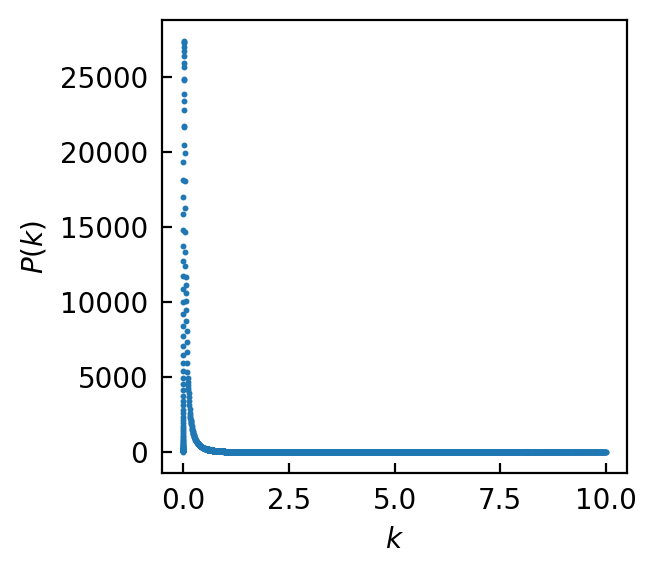

In [120]:
plt.figure(figsize=(3,3))
plt.xlabel(r'$k$'); plt.ylabel(r'$P(k)$')
plt.scatter(k, pk, marker='.', s=5 )
plt.show()

In [146]:
ktest = np.linspace(k.min(), k.max(), 5000)

pktest = poly_fit(k, pk, ktest, porder=150)

C:\Users\akrav\AppData\Local\Temp\ipykernel_15788\1871357950.py:3: RankWarning: Polyfit may be poorly conditioned
  pktest = poly_fit(k, pk, ktest, porder=150)


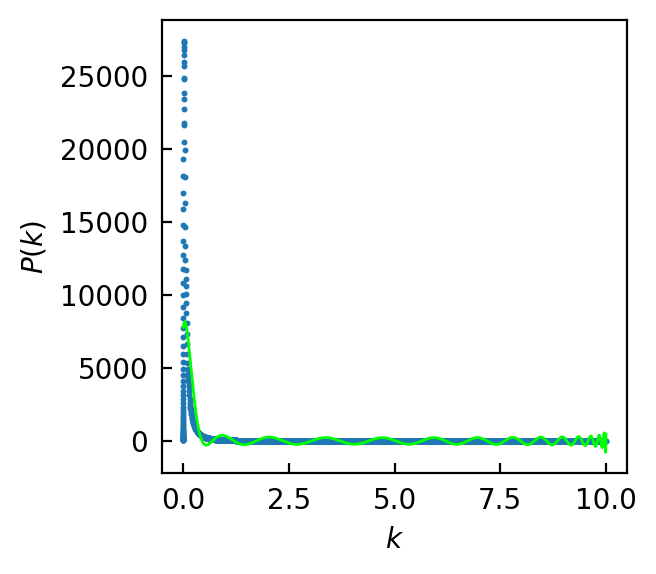

In [147]:
plt.figure(figsize=(3,3))
plt.xlabel(r'$k$'); plt.ylabel(r'$P(k)$')
plt.scatter(k, pk, marker='.', s=5 )
plt.plot(ktest, pktest, c='lime', lw=1)
plt.show()

In [134]:
lktest = np.linspace(lk.min(), lk.max(), 5000)

lpktest = poly_fit(lk, lpk, lktest, porder=10)

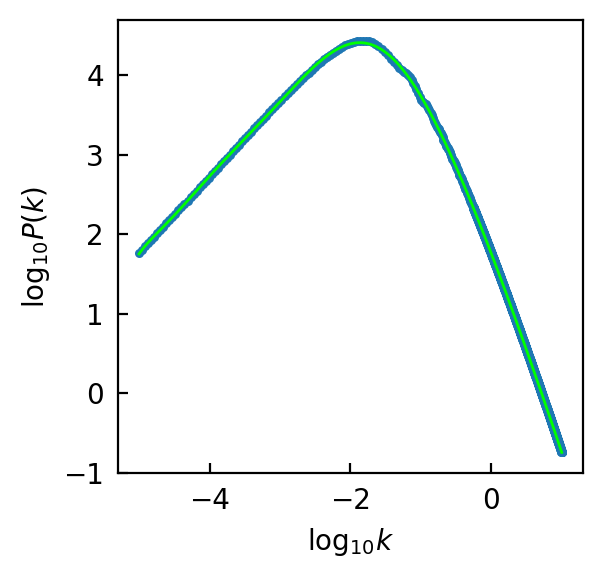

In [135]:
plt.figure(figsize=(3,3))
plt.xlabel(r'$\log_{10} k$'); plt.ylabel(r'$\log_{10} P(k)$')
plt.scatter(lk, lpk, marker='.', s=20 )
plt.plot(lktest, lpktest, c='lime', lw=1)
plt.show()

### <font color='blue'>Regression as a method to characterize the mean trend in the data</font>

In [213]:
# test your routine using code below
xmin, xmax, ntr = 0., 6, 20
xtr = np.linspace(xmin, xmax, ntr)

# training values for regression
ftr_fit = ftr_func(xtr) + np.random.normal(scale=0.5, size=np.size(xtr))

nt = 1000 # should be different from nt
xt = np.linspace(xmin, xmax, nt)

porder = 4
pfit = poly_fit(xtr, ftr_fit, xt, porder=porder)

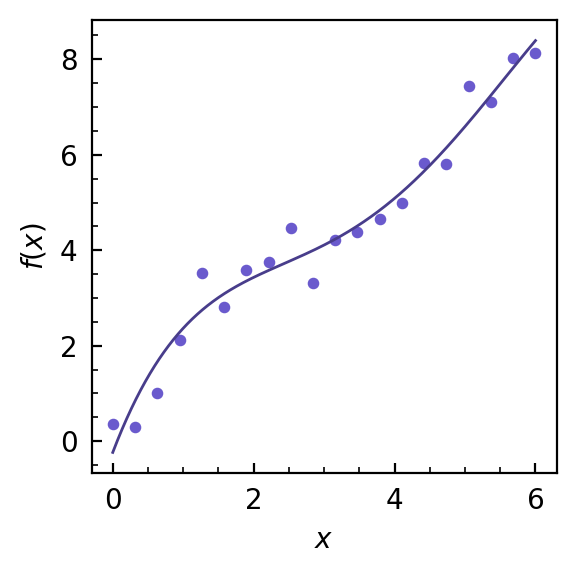

In [214]:

plot_line_points(xt, pfit, xp=xtr, yp=ftr_fit, points=True, psize=40, 
                 xlabel=r'$x$', ylabel=r'$f(x)$', figsize=3)

### <font color='darkblue'>Conclusions

* Polynomial approximation can be highly accurate for smooth functions, such as $d_L$, although accuracy is limited if high polynomial order is needed due to numerical reasons. 


* Accuracy is sensitive to how we approximate and, in particular, on the placement of the training tabulated parameter values.

    
* Beware of discontinuous functions or functions with discontinuous derivatives if using polynomial approximation 
    

* For the training parameter values distributed at the Chebyshev nodes, results accurate to near machine precision can be obtained for smooth functions with about 1000-fold speed up of calculation! 

### <font color='darkblue'>Caveats 

* The particular conclusions we reached about polynomial interpolation are applicable to smooth functions. 

* For example, functions with discontinuous first derivatives make accurate polynomial interpolation with equally spaced training points more or less impossible. 

* For non-smooth functions polynomial interpolation with Chebyshev nodes may still work pretty well, but we are not guaranteed to reach machine precision. 

* Choice of interpolation nodes is not always possible (for example, if you deal with data tabulated by someone else). 

* Even for smooth functions with continuous derivatives accurate results can only be guaranteed within the interval of the training set $x\in[x_0,x_N]$. Estimates outside of this interval generally quickly become very inaccurate.

### <font color='darkblue'>Approximating functions with discontinuities 

The functions that have discontinuities present another challenge due to the effect called ***Gibbs phenomenon*** illustrated below for the "square pulse" function. 

In [49]:
def square_pulse_scalar(x):
    """
    square pulse (aka top-hat) function centered on of width 1.0 
    
    Parameters: 
    x: scalar value
    """
    if x < -0.5 or x > 0.5:
        return 0
    elif (x >= -0.5) & (x < 0.5):
        return 1.

In [50]:
def square_pulse(x, location=0., width=0.5, amplitude=1.):
    """
    the same as above but vectorized, so that function can take x as numpy vector 
    and return vector of evalued function values
    
    Parameters:
        x: numpy vector of floats
        location: center x of the pulse
        width: width of the pulse
        amplitude: amplitude of the pulse
    """
    fsx = np.zeros_like(x)
    fsx[np.abs(x-location) <= width] = amplitude
    return fsx 

In [51]:
xmin, xmax, ntr = -2., 2., 100
xtr = np.linspace(xmin, xmax, ntr)
xtr = chebyshev_nodes2(xmin, xmax, ntr)

ftr = square_pulse(xtr, amplitude=2.)

# fit polynomial of order N
N = ntr
afit = np.polyfit(xtr, ftr, N)
pfit = np.poly1d(afit)

C:\Users\akrav\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3361: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


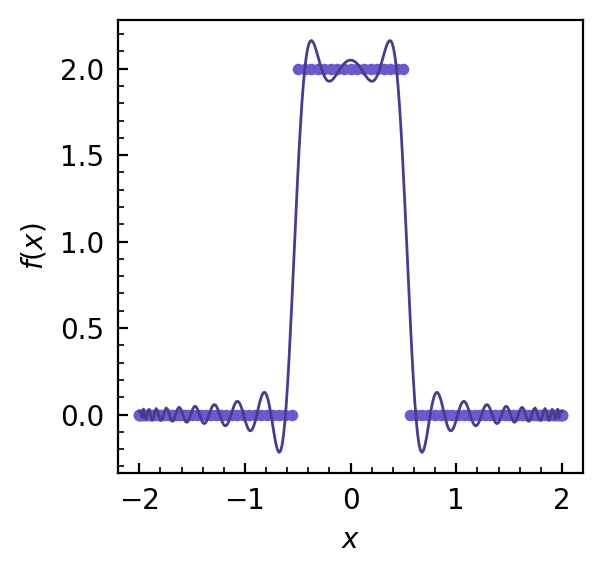

In [52]:
nt = 300
xt = np.linspace(xmin, xmax, nt)
plot_line_points(xt, pfit(xt), xp=xtr, yp=ftr, points=True, psize=40, 
                 xlabel='$x$', ylabel='$f(x)$', figsize=3)

The oscillations in the plot above are called ***Gibbs oscillations*** or <a href="https://en.wikipedia.org/wiki/Gibbs_phenomenon">***Gibbs phenomenon***</a> and arise whenever we try to use polynomial-based or generally expansion basis consisting of continuous functions to approximate discontinuous ones. 

Gibbs phenomenon was actually discovered by mathematician Henry Wilbraham in 1848 while working on his MSc degree at Cambridge University, when he was 23 years old. It was then rediscovered by Josiah Willard Gibbs in 1899 (i.e., 50 years later) close in time to the discovery of Runge phenomenon and has become widely known after that. 